It is known that if $(x_1, y_1)$ is a torsion point of $E(\mathbb{Q})$, i.e., a point of finite order, then $4x_1$ and $8y_1$ are integers.

Consider the following elliptic curve
\begin{equation}
    y^2 + y = x^3 + x^2 + 2x + 4
\end{equation}
We can test small integer values for $x$ and see if they yield a rational (or integer) $y$.

*   Try $x = 0$: Then $y² + y - 4 = 0$. The quadratic formula gives 4y = (-1 \pi \sqrt{17})/2$, which is not rational.
*   Try $x = 14: Then $y^2 + y - 8 = 0$. The discriminant is $33$ which is not a perfect square.
*   Try $x = -1$: Then $y^2 + y - 2 = 0$. This factors as $(y + 2)(y - 1) = 0$.
which gives us two non-trivial integer solutions $y = 1$ and $y = -2$.

Let $P = (-1, 1)$ so the other point is $Q = (-1, -2)$. To find the subgroup generated by $P$, we need to calculate the multiples of $P$ until we get the identity element $O$ which is the point at infinity. This turns out to be $P^5$, thus the order of the point $P$ is $5$ and the subgroup generated by P is
\begin{equation}
    \langle P \rangle = \{ O, (-1, 1), (2, -5), (2, 4), (-1, -2) \}.
\end{equation}
This is a cyclic group of order $5$.

We calculate the discriminant to be $\Delta(E) = -6075 = -3^5 \cdot 5^2$. The primes of bad reduction are $3$ and $5$. Let us compute the order $|E(\mathbb{F}_p)|$ for the first few primes of good reduction.

*   For $p = 2$: we have $y^2 + y = x^3 + x^2$. This has two solutions regardless of what $x$ is, so the total points is $1 + 2 + 2 = 5$.
*   For $p = 7$: Running the program gives $|E(F_7)| = 5$.
*   For $p = 11$: Running the program gives $|E(F_{11})| = 10$.

The clear suggestion is that the order of the torsion subgroup over $\mathbb{Q}$ divides the order of the group over $\mathbb{F}_p$ for every prime $p$ of good reduction.

We can prove this relation. Let $E$ be an elliptic curve over $\mathbb{Q}$. For a prime $p$ where $E$ has good reduction, we can define a map $\phi_p : E(\mathbb{Q}) \to E(\mathbb{F}_p)$ by taking a point $P = (x, y)$ with rational coordinates and reducing them modulo $p$. For this to be well-defined, we write $x = a/b$ and $y = c/d$ in lowest terms, and require that $p$ does not divide $b$ or $d$. The point at infinity $O$ maps to the point at infinity over $\mathbb{F}_p$.

We use the fact that the reduction modulo $p$ map $\phi_p$ is a group homomorphism and the restriction to the torsion subgroup is injective.

Let $T$ be the torsion subgroup of $E(\mathbb{Q})$. Let $G = E(\mathbb{F}_p)$ be the group of points on the curve over $\mathbb{F}_p$ for a prime $p$ of good reduction. The reduction map $\phi_p$ provides an injective homomorphism from $T into G$. By the first isomorphism theorem, $T$ is isomorphic to the image which is a subgroup $H = \phi_p(T)$. By Lagrange's theorem $|H|$ divides $|G|$, hence $|T|$ must divide $|G|$ as required.

---

We are interested in the statistical distribution of the number of points on an elliptic curve on finite fields.


--- Generating Sato-Tate Distribution for: Non-CM Curve: $y^2+y=x^3-x$ (up to p=5000) ---
  ... processed 500 primes, current p = 3581


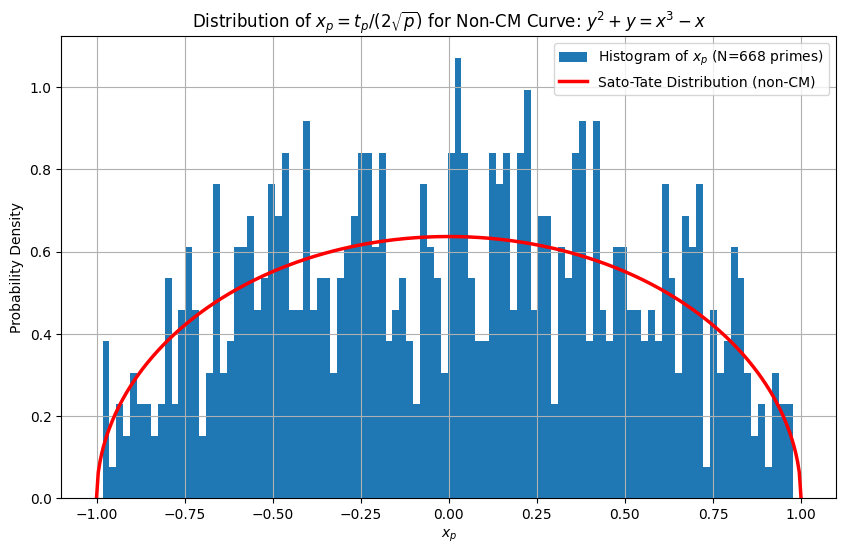

--- Generating Sato-Tate Distribution for: CM Curve: $y^2=x^3+x$ (up to p=5000) ---
  ... processed 500 primes, current p = 3581


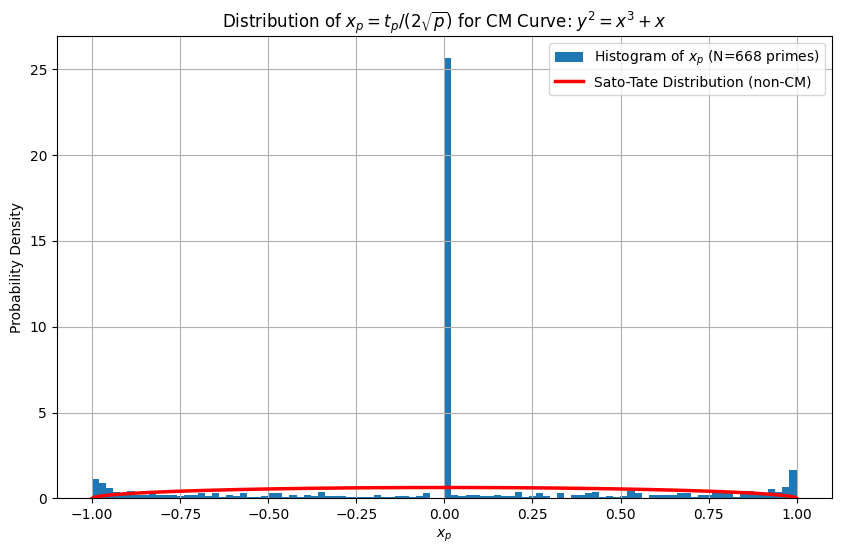

--- Generating Sato-Tate Distribution for: CM Curve: $y^2=x^3+1$ (up to p=5000) ---
  ... processed 500 primes, current p = 3581


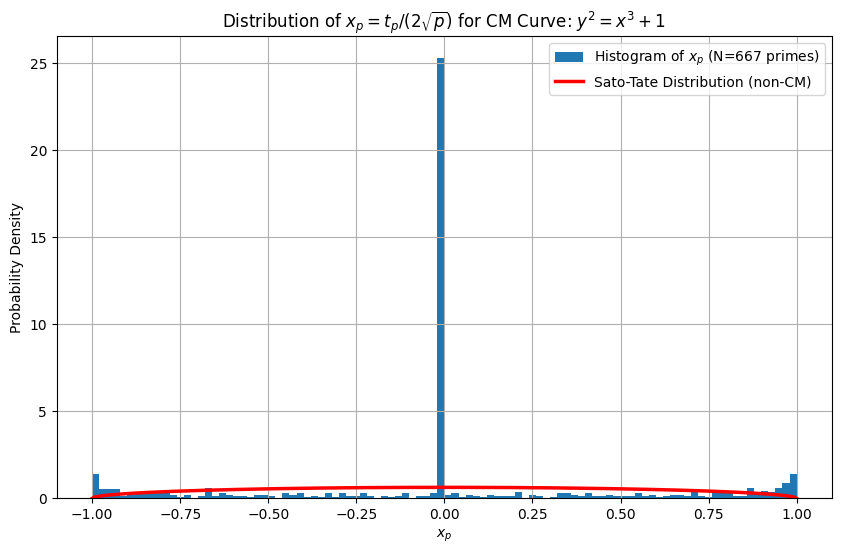

--- Generating Sato-Tate Distribution for: CM Curve: $y^2=x^3+7x^2+2x$ (up to p=5000) ---
  ... processed 500 primes, current p = 3581


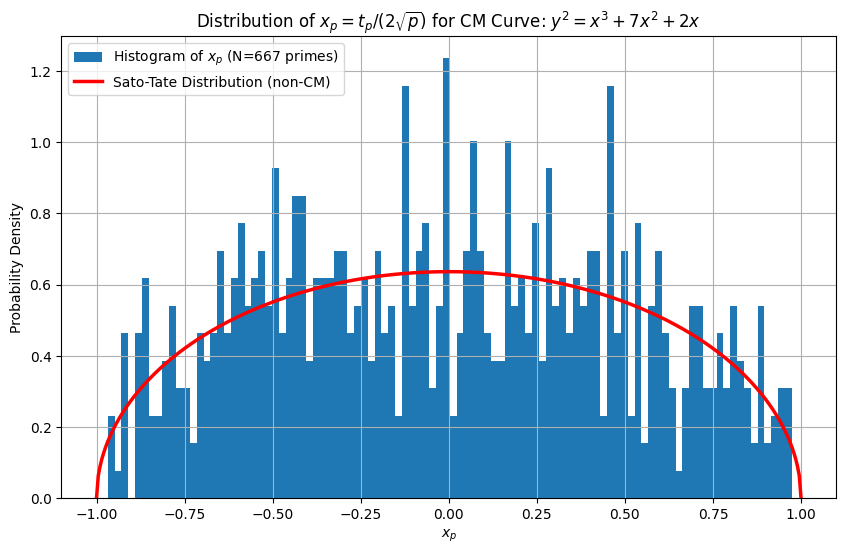

--- Generating Sato-Tate Distribution for: CM Curve: $y^2+xy+y=x^3+x^2-5x-7$ (up to p=5000) ---
  ... processed 500 primes, current p = 3581


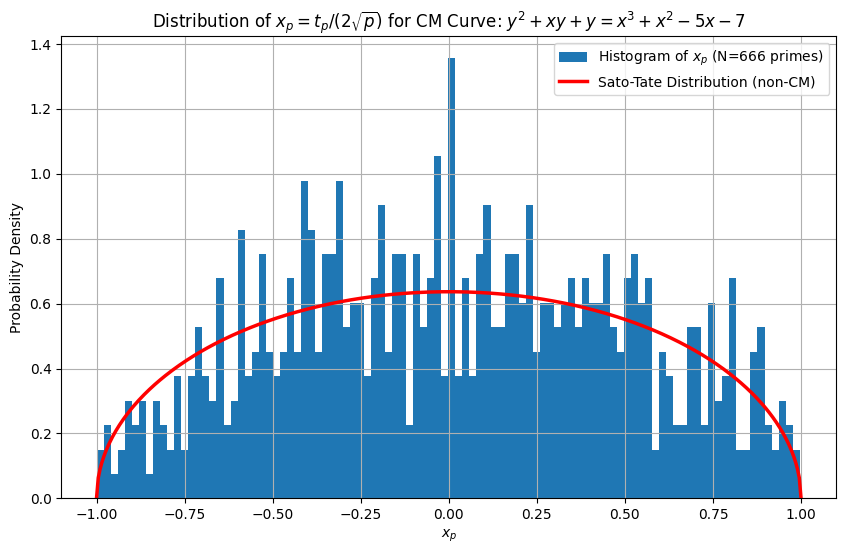

--- Generating Sato-Tate Distribution for: CM Curve: $y^2=x^3-14x^2+41x$ (up to p=5000) ---
  ... processed 500 primes, current p = 3581


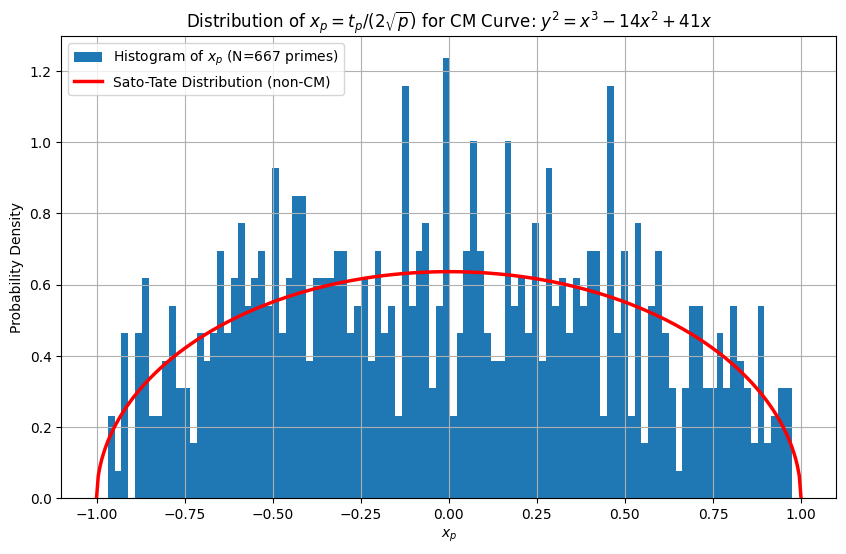

In [18]:
# You must have matplotlib installed: pip install matplotlib
import math
import matplotlib.pyplot as plt
import numpy as np

class EllipticCurve:

    def __init__(self, coeffs, p=None):
        if p and not self._is_prime(p):
            raise ValueError("p must be a prime number.")
        self.p = p
        self.coeffs = coeffs
        if p:
            self.a1, self.a2, self.a3, self.a4, self.a6 = [c % p for c in coeffs]
        else:
            self.a1, self.a2, self.a3, self.a4, self.a6 = coeffs
        self._calculate_invariants()

    def _calculate_invariants(self):
        a1, a2, a3, a4, a6 = self.a1, self.a2, self.a3, self.a4, self.a6
        self.b2 = a1**2 + 4 * a2
        self.b4 = a1 * a3 + 2 * a4
        self.b6 = a3**2 + 4 * a6
        self.b8 = a1**2 * a6 - a1 * a3 * a4 + 4 * a2 * a6 + a2 * a3**2 - a4**2
        self.delta = -self.b2**2 * self.b8 - 8 * self.b4**3 - 27 * self.b6**2 + 9 * self.b2 * self.b4 * self.b6
        if self.p:
            self.b2 %= self.p
            self.b4 %= self.p
            self.b6 %= self.p
            self.b8 %= self.p
            self.delta %= self.p

    def __str__(self):
        field_str = f"(mod {self.p})" if self.p else "over Z"
        return f"y^2 + {self.a1}xy + {self.a3}y = x^3 + {self.a2}x^2 + {self.a4}x + {self.a6} {field_str}"

    def order(self):
        # This method has O(p log p) complexity, which is acceptable for this problem.
        if not self.p: raise TypeError("Order is only for curves over Fp.")
        if self.delta == 0: raise ValueError("Order is not defined for singular curves.")
        order_val = 1
        if self.p == 2:
            for x in range(2):
                rhs = (x**3 + self.a2 * x**2 + self.a4 * x + self.a6) % 2
                lhs_factor = (1 + self.a1 * x + self.a3) % 2
                if lhs_factor == 1: order_val += 1
                elif rhs == 0: order_val += 2
        else:
            for x in range(self.p):
                rhs = (x**3 + self.a2 * x**2 + self.a4 * x + self.a6) % self.p
                k = (self.a1 * x + self.a3) % self.p
                v = (rhs + (k * pow(2, self.p - 2, self.p))**2) % self.p
                legendre = pow(v, (self.p - 1) // 2, self.p)
                if legendre == self.p - 1: legendre = -1
                order_val += (1 + legendre)
        return order_val, self.p + 1 - order_val

    def reduce_modulo(self, p):
        if self.p: raise TypeError("Cannot reduce a curve already over Fp.")
        return EllipticCurve(self.coeffs, p=p)

    def sato_tate_distribution(self, p_limit, title=""):
        '''
        Calculates and plots the Sato-Tate distribution for the curve.
        Requires the curve to be defined over Z (p=None).
        '''
        if self.p:
            raise TypeError("This analysis is for curves over Q.")
        print(f"--- Generating Sato-Tate Distribution for: {title} (up to p={p_limit}) ---")

        normalized_traces = []
        bad_primes = set(self._prime_factorize(self.delta).keys())

        # Use the prime sieve
        primes = self._get_primes_sieve(p_limit)

        for i, p in enumerate(primes):
            if p in bad_primes:
                continue

            # --- Progress Indicator ---
            if i % 500 == 0 and i > 0:
                print(f"  ... processed {i} primes, current p = {p}")

            reduced_curve = self.reduce_modulo(p)
            _, t_p = reduced_curve.order()
            x_p = t_p / (2 * math.sqrt(p))
            normalized_traces.append(x_p)

        plt.figure(figsize=(10, 6))
        plt.hist(normalized_traces, bins=100, density=True, label=f'Histogram of $x_p$ (N={len(normalized_traces)} primes)')
        x_theory = np.linspace(-1, 1, 400)
        y_theory_st = (2 / np.pi) * np.sqrt(1 - x_theory**2)
        plt.plot(x_theory, y_theory_st, 'r-', linewidth=2.5, label='Sato-Tate Distribution (non-CM)')
        plt.title(f"Distribution of $x_p = t_p / (2\\sqrt{{p}})$ for {title}")
        plt.xlabel("$x_p$")
        plt.ylabel("Probability Density")
        plt.legend()
        plt.grid(True)
        plt.show()

    @staticmethod
    def _is_prime(n):
        if n < 2: return False
        for i in range(2, int(math.sqrt(n)) + 1):
            if n % i == 0: return False
        return True

    @staticmethod
    def _prime_factorize(n):
        n = abs(n)
        factors = {}
        d = 2
        while d * d <= n:
            while (n % d) == 0:
                factors[d] = factors.get(d, 0) + 1
                n //= d
            d += 1
        if n > 1: factors[n] = factors.get(n, 0) + 1
        return factors

    @staticmethod
    def _get_primes_sieve(limit):
        '''
        Efficiently generate primes up to a limit using the Sieve of Eratosthenes.
        '''
        primes = []
        is_prime = [True] * (limit + 1)
        is_prime[0] = is_prime[1] = False
        for p in range(2, int(math.sqrt(limit)) + 1):
            if is_prime[p]:
                for multiple in range(p*p, limit + 1, p):
                    is_prime[multiple] = False
        for p in range(2, limit + 1):
            if is_prime[p]:
                primes.append(p)
        return primes

PRIME_LIMIT = 5000

# A "generic" curve without Complex Multiplication
curve_non_cm = EllipticCurve(coeffs=[0, -1, 1, 0, 0]) # y^2 + y = x^3 - x
curve_non_cm.sato_tate_distribution(p_limit=PRIME_LIMIT, title="Non-CM Curve: $y^2+y=x^3-x$")

# A curve with Complex Multiplication by Z[i]
curve_cm1 = EllipticCurve(coeffs=[0, 0, 0, 1, 0]) # y^2 = x^3 + x
curve_cm1.sato_tate_distribution(p_limit=PRIME_LIMIT, title="CM Curve: $y^2=x^3+x$")

# A curve with Complex Multiplication by Z[e^(2*pi*i/3)]
curve_cm2 = EllipticCurve(coeffs=[0, 0, 0, 0, 1]) # y^2 = x^3 + 1
curve_cm2.sato_tate_distribution(p_limit=PRIME_LIMIT, title="CM Curve: $y^2=x^3+1$")

# y^2 = x^3 + 7x^2 + 2x
curve_a = EllipticCurve([0, 7, 0, 2, 0])
curve_a.sato_tate_distribution(p_limit=PRIME_LIMIT, title="CM Curve: $y^2=x^3+7x^2+2x$")

# y^2 + xy + y = x^3 + x^2 - 5x - 7
curve_b = EllipticCurve([1, 1, 1, -5, -7])
curve_b.sato_tate_distribution(p_limit=PRIME_LIMIT, title="CM Curve: $y^2+xy+y=x^3+x^2-5x-7$")

# y^2 = x^3 - 14x^2 + 41x
curve_c = EllipticCurve([0, -14, 0, 41, 0])
curve_c.sato_tate_distribution(p_limit=PRIME_LIMIT, title="CM Curve: $y^2=x^3-14x^2+41x$")

Based on these graphs, it is highly unlikely that any of last three elliptic curves from have complex multiplication. Their distributions of $x_p$ values behave exactly as predicted for typical non-CM curves, showing no evidence of the spikes or biases that characterize CM curves.